# 提出区分【c】深層学習_day1
## Section1: 入力層～中間層
#### 確認テスト
・動物分類の例を図示
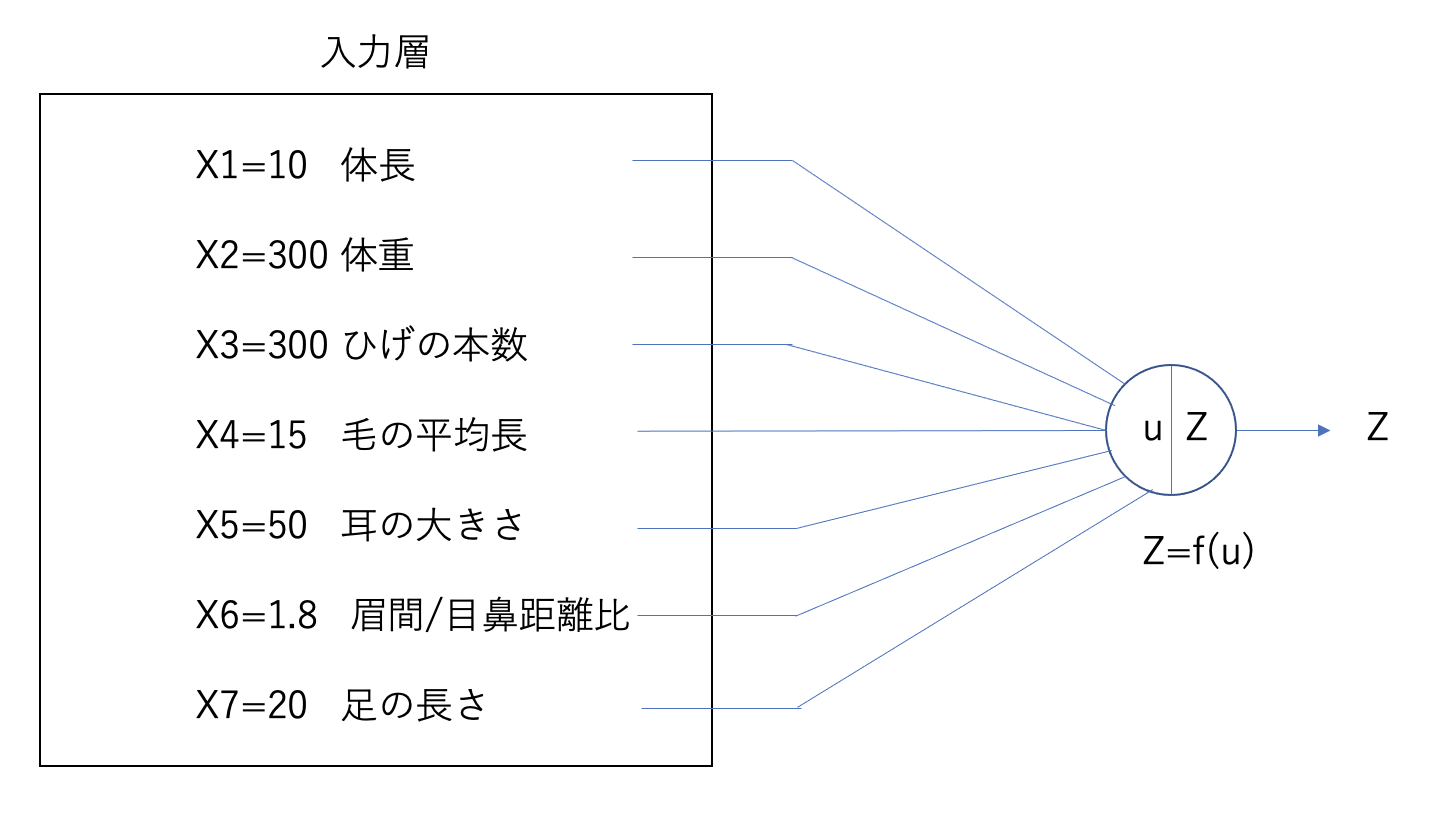<br>
・pythonで$u=w_1x_1+w_2x_2+w_3x_3+w_4x_4+b$を記述<br>
u=np.dot(x,W)+b<br>
・中間層の定義を抽出<br>
2層の総入力<br>
u2 = np.dot(z1, W2) + b2<br>
2層の総出力<br>

## Section3: 出力層
#### 確認テスト
・線形と非線形の違い<br>
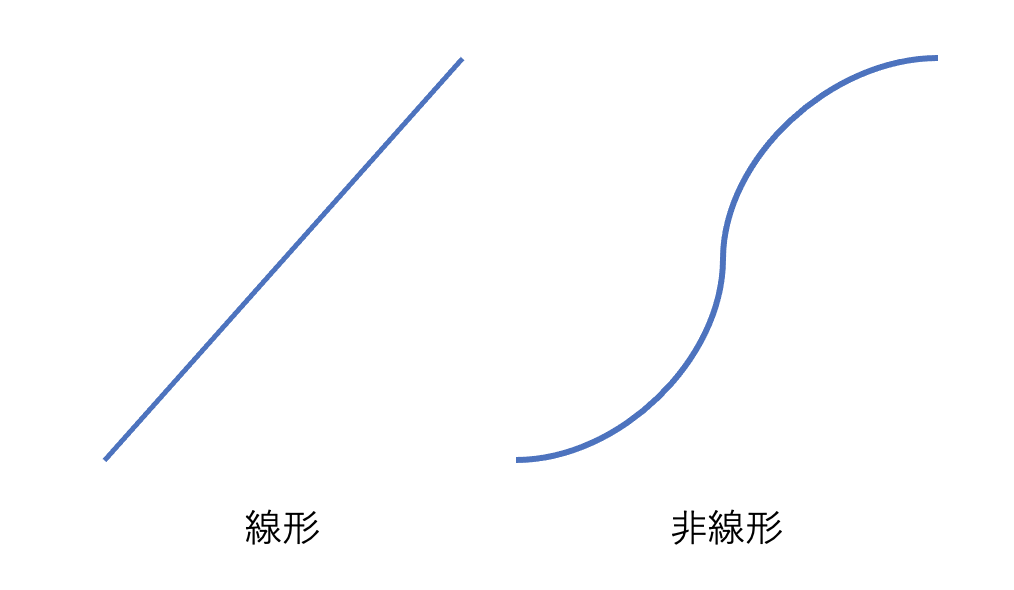<br>
・コードの活性化関数に該当する箇所<br>
1層の総出力<br>
z1 = functions.relu(u1)<br>
2層の総出力<br>
z2 = functions.relu(u2)<br>

## Section3: 出力層
#### 確認テスト
●誤差関数に関して<br>
・なぜ引き算ではなく2乗するのか<br>
=>2乗することで負の値が持つ情報量が保持されるから<br>
・2乗平均誤差の1/2はどういう意味か<br>
=>微分した際に計算式が簡略化されるから<br>
・ソフトマックス関数の処理の説明<br>
If文の中はミニバッチとしてデータが取り扱われる時に使用される。<br>
x = x - np.max(x)はオーバーフロー対策(expは指数関数的に大きくなるため)<br>
np.exp(x) / np.sum(np.exp(x))で確率に落とし込む。全て足すと1になる。

    def softmax(x):
        if x.ndim == 2:
            x = x.T
            x = x - np.max(x, axis=0)
            y = np.exp(x) / np.sum(np.exp(x), axis=0)
            return y.T
    x = x - np.max(x) # オーバーフロー対策
    return np.exp(x) / np.sum(np.exp(x))
 
・交差エントロピー処理の説明<br>
yは0又は1。ニューラルネットワークがd番目が正解とした場所。<br>
対数関数は０に近づくと－∞に発散してしまうため1e-7を足している。<br>
  
    def cross_entropy_error(d, y):
    if y.ndim == 1:
        d = d.reshape(1, d.size)
        y = y.reshape(1, y.size)
        
    # 教師データがone-hot-vectorの場合、正解ラベルのインデックスに変換
    if d.size == y.size:
        d = d.argmax(axis=1)
             
    batch_size = y.shape[0]
    return -np.sum(np.log(y[np.arange(batch_size), d] + 1e-7)) / batch_size

## Section4： 勾配降下法
#### 確認テスト
・オンライン学習とは<br>
学習データが入ってくるたびに都度パラメータを更新し、学習を進める手法。バッチ学習は一度に全ての学習データを使ってパラメータ更新を行う。<br>
・$w^{(t+1)}=w^{(t)}+ε∇E_t$の数式の説明<br>
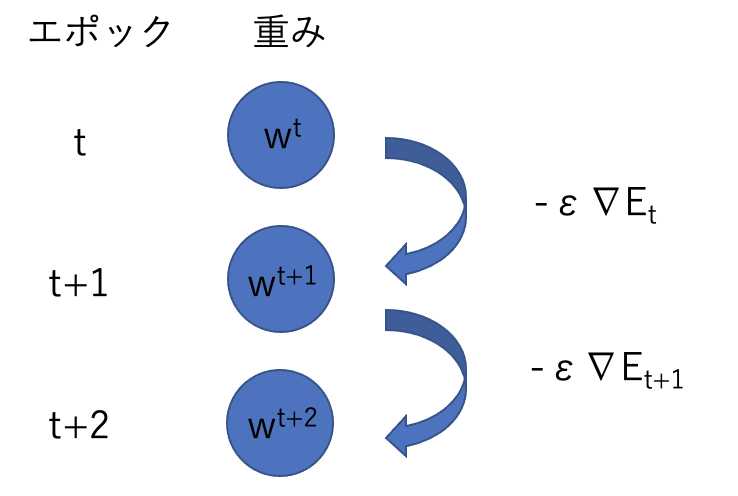

## Section5： 誤差逆伝播
#### 確認テスト
・誤差逆伝播法で既に行った計算結果を保持しているコードの抽出<br>
    delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)<br>
・偏微分の式<br>
$\frac{∂E}{∂y}\frac{∂y}{∂u}:$delta1 = np.dot(delta2, W2.T) * functions.d_sigmoid(z1)<br>
$\frac{∂E}{∂y}\frac{∂y}{∂u}\frac{∂u}{∂w_ji^{(2)}}$=    grad['W1'] = np.dot(x.T, delta1)